In [1]:
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [105]:
class KNN_impute:

    def __init__(self, datafile, IDs = []):
        self.data = pd.read_csv(datafile)
        self.IDs = IDs

    def scale (self, scaler):
        self.scaler = scaler
        self.scaler.fit_transform(self.data.drop(self.IDs, axis=1))
        
    def impute (self, imputer):
        self.imputer = imputer
        self.imputed_data = self.imputer.fit_transform(self.data)
        self.output_df = pd.DataFrame(self.imputed_data, columns=self.data.columns)
        
    def unique_viz (self, csvname):
        self.unique = pd.DataFrame(self.output_df.drop(self.IDs, axis=1).nunique(axis=0))
        self.unique.columns = ["num_unique"]
        self.unique.index.name = 'feature'
        self.cutpoint_plot = self.unique.plot.line(figsize=(18,4))
        self.unique.to_csv(csvname, index=True)
        
    def filterCols (self, cutpoint, csvname):
        self.new_df = self.output_df
        for col in self.output_df.drop(self.IDs, axis=1).columns:
            if len(self.output_df[col].unique()) < cutpoint:
                self.new_df = self.new_df.drop(col,axis=1)
        self.new_df.to_csv(csvname, index=False)

#### Running through KNN Imputation with yaw data

     labvisitid  presence    yaw_0.5  ...   yaw_461.5    yaw_462   yaw_462.5
0           1.0       4.0 -12.819052  ... -144.345963 -144.78479 -147.893539
1           2.0       3.2 -14.121522  ... -144.345963 -144.78479 -147.893539
2           3.0       3.4   0.382742  ... -144.345963 -144.78479 -147.893539
3           4.0       2.8   9.441733  ... -144.345963 -144.78479 -147.893539
4           5.0       3.4  -0.114574  ... -144.345963 -144.78479 -147.893539
..          ...       ...        ...  ...         ...        ...         ...
211       259.0       2.8   5.935023  ... -144.345963 -144.78479 -147.893539
212       260.0       3.4  13.093811  ... -144.345963 -144.78479 -147.893539
213       261.0       4.0   3.386689  ... -144.345963 -144.78479 -147.893539
214       262.0       4.8 -38.686317  ... -144.345963 -144.78479 -147.893539
215       263.0       4.4  17.530165  ... -144.345963 -144.78479 -147.893539

[216 rows x 927 columns]


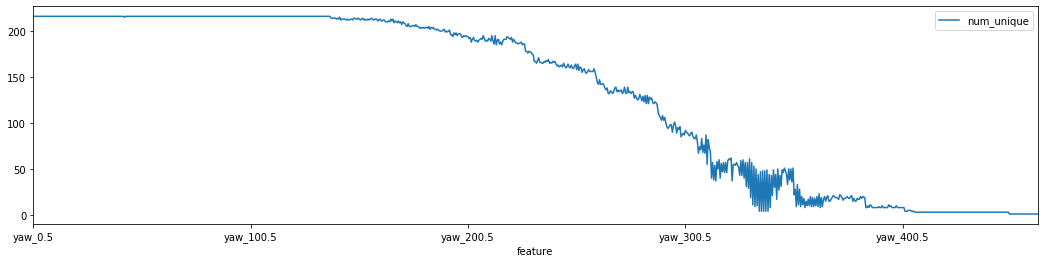

In [110]:
yaw = KNN_impute("YawData_1Dec20.csv", IDs = ['labvisitid', 'presence'])
yaw.scale(MinMaxScaler())
yaw.impute(KNNImputer(n_neighbors=3))
yaw_all = pd.DataFrame(yaw.output_df)
print(yaw_all)
yaw.unique_viz("yaw_unique.csv")
yawline = yaw.cutpoint_plot

In [111]:
yaw.filterCols(63, "yaw_imputed.csv")

#### Running through KNN Imputation with pitch data

     labvisitid  presence  pitch_0.5  ...  pitch_461.5  pitch_462  pitch_462.5
0           1.0       4.0  15.674242  ...    -6.314604   4.805901     4.655201
1           2.0       3.2   2.601668  ...    -6.314604   4.805901     4.655201
2           3.0       3.4  -4.885808  ...    -6.314604   4.805901     4.655201
3           4.0       2.8  21.261566  ...    -6.314604   4.805901     4.655201
4           5.0       3.4  -7.469769  ...    -6.314604   4.805901     4.655201
..          ...       ...        ...  ...          ...        ...          ...
211       259.0       2.8  -0.195136  ...    -6.314604   4.805901     4.655201
212       260.0       3.4  -2.470367  ...    -6.314604   4.805901     4.655201
213       261.0       4.0  -2.905933  ...    -6.314604   4.805901     4.655201
214       262.0       4.8   7.947235  ...    -6.314604   4.805901     4.655201
215       263.0       4.4  -7.146519  ...    -6.314604   4.805901     4.655201

[216 rows x 927 columns]


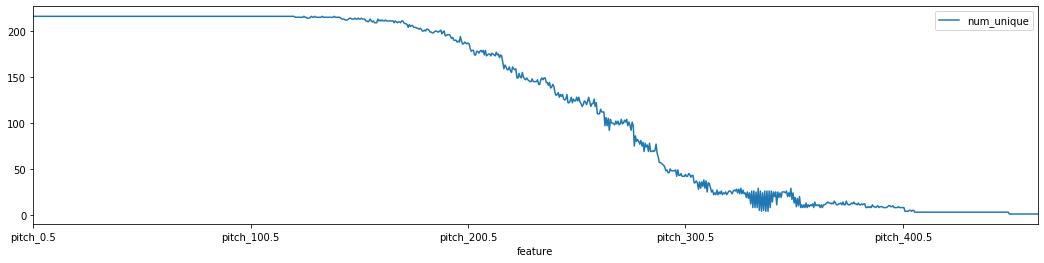

In [112]:
pitch = KNN_impute("PitchData_1Dec20.csv", IDs = ['labvisitid', 'presence'])
pitch.scale(MinMaxScaler())
pitch.impute(KNNImputer(n_neighbors=3))
pitch_all = pd.DataFrame(pitch.output_df)
print(pitch_all)
pitch.unique_viz("pitch_unique.csv")
pitchline = pitch.cutpoint_plot

In [113]:
pitch.filterCols(63, "pitch_imputed.csv")